# Kaggle challenge link
https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction

## Importing libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from zipfile import ZipFile

## Reading in Dataset

In [41]:
#unzipping file
with ZipFile('train.csv.zip', 'r') as f:
    f.extractall()

In [42]:
df = pd.read_csv("train.csv",parse_dates = ['pickup_datetime'],nrows = 100_000)
test = pd.read_csv('test.csv', parse_dates = ['pickup_datetime'])

VarNames = ['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

In [43]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [44]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [45]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [46]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Plots

pickup_latitude


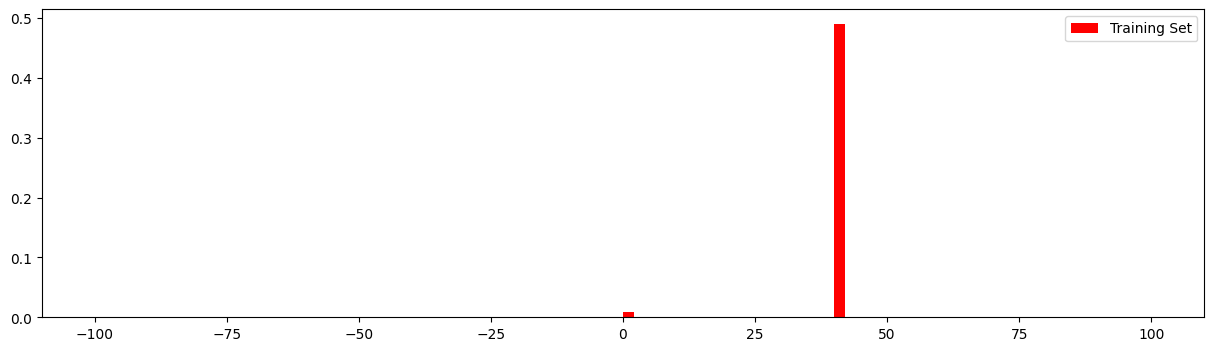

dropoff_longitude


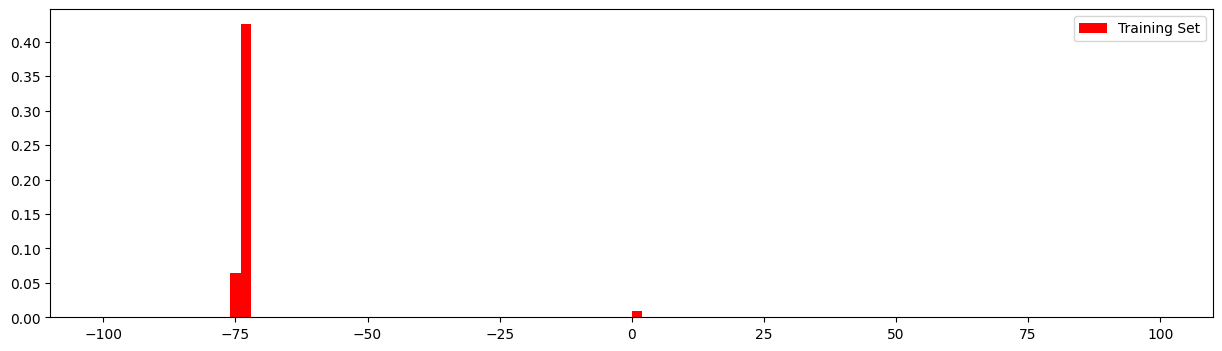

dropoff_latitude


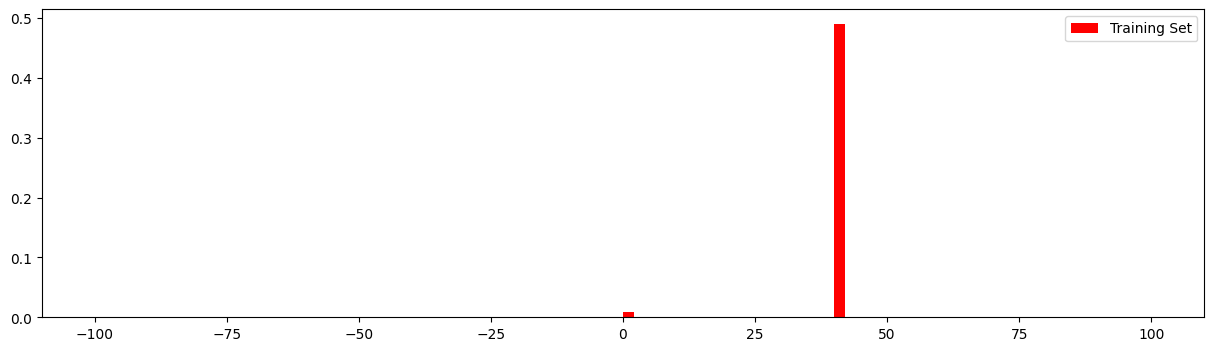

passenger_count


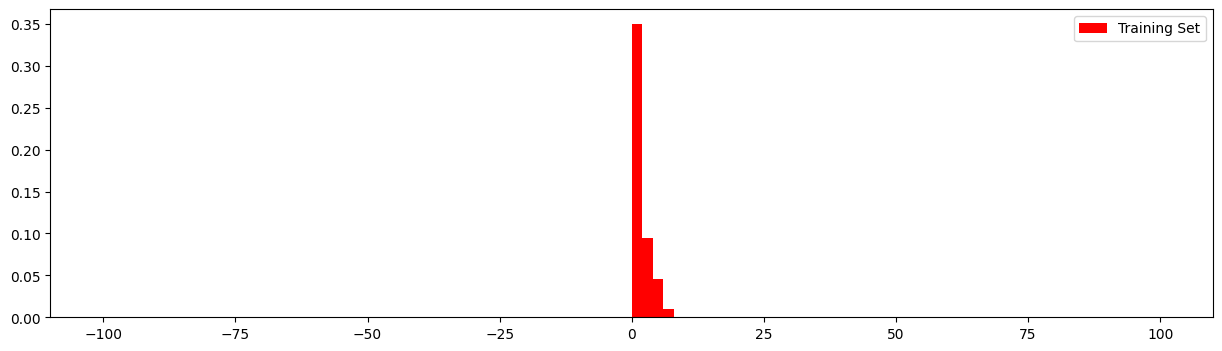

In [48]:
for var in VarNames[2:]:
    print (var)
    plt.figure(figsize=(15,4))
    plt.hist(np.array(df[var]),bins=100,range = (-100,100),color="red",label="Training Set",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 4))

plt.hist(df['fare_amount'], bins=100,range = (0,65), color='red')
plt.xlabel("Fare price (USD)")
plt.title("Histogram plot of Fare price (USD)")
plt.show()

# Data Preprocessing

In [14]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

### Dropping missing values

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  object             
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [17]:
X = df.drop(['key', 'fare_amount','pickup_datetime'], axis = 1)
y = df['fare_amount']

In [18]:
test = test.drop(['key','pickup_datetime'], axis = 1)

### Splitting data into training and validation sets

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 92)

In [20]:
#Validating the split
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(80000, 5) (20000, 5)
(80000,) (20000,)


# Prediction Models

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = reg.predict(X_train)

In [25]:
vali_pred = reg.predict(X_val)

In [30]:
train_rmse = mean_squared_error(y_train, pred)

#Root mean squared value on the val prediction
val_rmse = mean_squared_error(y_val, vali_pred)

print(f"The RMSE of the model on the train data is: {train_rmse}")
print(f"The RMSE of the model on the val data is: {val_rmse}")

The RMSE of the model on the train data is: 95.07413236167194
The RMSE of the model on the val data is: 91.59401874188534


In [54]:
pred_new = np.array(pred)
sub = pd.DataFrame({'fare_amount': pred_new})
sub_int = sub['fare_amount'].astype('int')

In [55]:
sub.to_csv('submission.csv', index=False) 